In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve, generate_binary_structure
from IPython.display import clear_output

In [2]:
def get_energy(lattice):
    kernel = generate_binary_structure(2, 1) 
    kernel[1][1] = False
    array = -lattice * convolve(lattice, kernel, mode='wrap')
    return array.sum()

In [3]:
def metropolis(lattice, times, B, energy, frames = 100, animate = True, return_lattice=True, H = 0):
    lattice = lattice.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    count = times/frames

    for t in range(0,times-1):
        #pick a random lattice site and flip the spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = lattice[x,y] #initial spin
        spin_f = -spin_i #proposed spin to flip
        
        #compute change in energy
        E_i = 0
        E_f = 0
        
        count +=  1

        if count >= times/frames and animate == True:
            count = 0
            clear_output(wait=True)
            plt.imshow(lattice)
            plt.axis('off')
            plt.pause(0.0001)
            
            
        
        E_i += -spin_i*lattice[x-1,y]
        E_f += -spin_f*lattice[x-1,y]
            
        if x<N-1:
            E_i += -spin_i*lattice[x+1,y]
            E_f += -spin_f*lattice[x+1,y]
        else:
            E_i += -spin_i*lattice[0,y]
            E_f += -spin_f*lattice[0,y]
            
        
        E_i += -spin_i*lattice[x,y-1]
        E_f += -spin_f*lattice[x,y-1]
            
        if y<N-1:
            E_i += -spin_i*lattice[x,y+1]
            E_f += -spin_f*lattice[x,y+1]
            
        else:
            E_i += -spin_i*lattice[x,0]
            E_f += -spin_f*lattice[x,0]
        
        #accept or reject the proposed spin change based on probability and energy change
        dE = E_f-E_i + H*spin_i
        if (dE>0) and (np.random.random() < np.exp(-B*dE)):
            lattice[x,y]=spin_f
            energy += dE
        elif dE<=0:
            lattice[x,y]=spin_f
            energy += dE
            
        net_spins[t] = lattice.sum()
        net_energy[t] = energy
    clear_output(wait=True)    

    plt.imshow(lattice) 
    plt.axis('off')
    if return_lattice == True:      
        return net_spins, net_energy, lattice
    else:
        return net_spins, net_energy 
    

In [4]:
N = 50

init_random = np.random.random((N,N))
lattice1 = np.zeros((N, N))
lattice1[init_random>=0.8] = 1 
lattice1[init_random<0.8] = -1

init_random = np.random.random((N,N))
lattice2 = np.zeros((N, N))
lattice2[init_random>=0.20] = 1 
lattice2[init_random<0.20] = -1


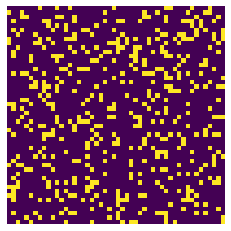

In [5]:
plt.imshow(lattice1)
plt.axis('off')
plt.show()

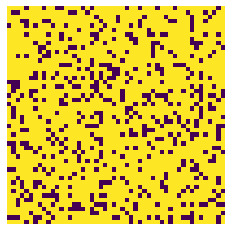

In [6]:
plt.imshow(lattice2)
plt.axis('off')
plt.show()

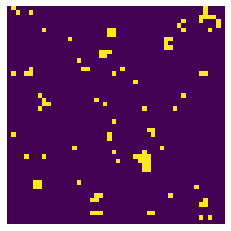

In [7]:
spins1, energies1, new_lattice1 = metropolis(lattice1, 1000000, .5, get_energy(lattice1), 100, H = 0)

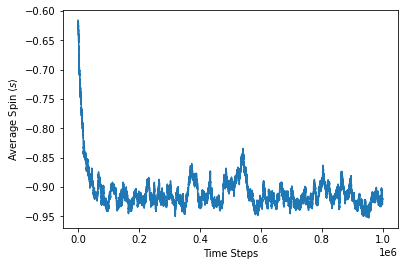

In [8]:
plt.plot(spins1/N**2)
plt.xlabel("Time Steps")
plt.ylabel(r"Average Spin $\langle s \rangle$")
plt.show()

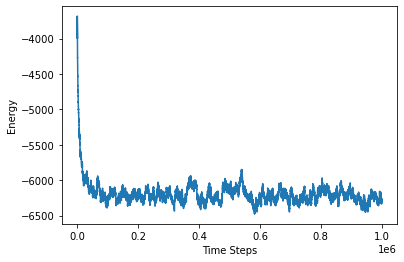

In [10]:
plt.plot(energies1)
plt.xlabel("Time Steps")
plt.ylabel(r"Energy")
plt.show()

In [11]:
def get_spin_energy_temp(lattice, Bs, iterations):
    s = np.zeros(len(Bs))
    energy_means = np.zeros(len(Bs))
    energy_stds = np.zeros(len(Bs))
    for i, b in enumerate(Bs):
        spins, energies = metropolis(lattice, iterations, b, get_energy(lattice), animate = False, return_lattice=False)
        s[i] = spins[-iterations//10:].mean()/N**2
        energy_means[i] = energies[-iterations//10:].mean()
        energy_stds[i] = energies[-iterations//10:].std()
    return s, energy_means, energy_stds

In [12]:
def get_spin_energy_extf(lattice, Fs, B, iterations):
    s = np.zeros(len(Fs))
    energy_means = np.zeros(len(Fs))
    energy_stds = np.zeros(len(Fs))
    for i, f in enumerate(Fs):
        spins, energies = metropolis(lattice, iterations, B, get_energy(lattice), animate = False, return_lattice=False, H = f)
        s[i] = spins[-iterations//10:].mean()/N**2
        energy_means[i] = energies[-iterations//10:].mean()
        energy_stds[i] = energies[-iterations//10:].std()
    return s, energy_means, energy_stds

In [ ]:
Bs = np.linspace(0.1, 2, 100)
s1, E_means1, E_stds1 = get_spin_energy_temp(lattice1, Bs, 1000000)
s2, E_means2, E_stds2 = get_spin_energy_temp(lattice2, Bs, 1000000)


In [ ]:
Fs = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
s_extf0, E_meansextf0, E_stdsextf0 = get_spin_energy_extf(lattice2, Fs, 1/2, 1000000)
s_extf1, E_meansextf1, E_stdsextf1 = get_spin_energy_extf(lattice2, Fs, 1/4, 1000000)
s_extf2, E_meansextf2, E_stdsextf2 = get_spin_energy_extf(lattice2, Fs, 1/6, 1000000)
s_extf3, E_meansextf3, E_stdsextf3 = get_spin_energy_extf(lattice2, Fs, 1/8, 1000000)


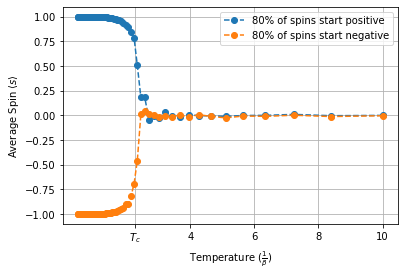

In [15]:
plt.plot(1/Bs, s2, "o--", label = "80% of spins start positive")
plt.plot(1/Bs, s1, "o--", label = "80% of spins start negative")
plt.grid()
plt.xlabel(r'Temperature $(\frac{1}{\beta})$')
plt.ylabel(r'Average Spin $\langle s \rangle$')
plt.xticks([2.269, 4, 6, 8, 10], [r'$T_c$', 4, 6, 8, 10])
plt.legend()
plt.savefig('Curie.png', dpi=200, bbox_inches = "tight")
plt.show()

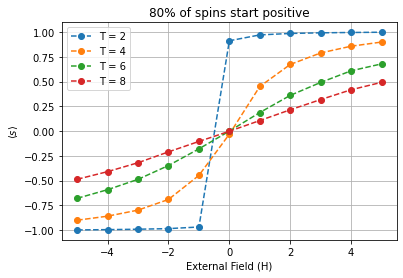

In [16]:
plt.plot(Fs, s_extf0, "o--", label ="T = 2")
plt.plot(Fs, s_extf1, "o--", label ="T = 4")
plt.plot(Fs, s_extf2, "o--", label = "T = 6")
plt.plot(Fs, s_extf3, "o--", label = "T = 8")
plt.title("80% of spins start positive")
plt.grid()
plt.xlabel('External Field (H)')
plt.ylabel(r'$\langle s \rangle$')
plt.legend()
plt.savefig('ExtField.png', dpi=200, bbox_inches = "tight")
plt.show()

In [17]:
def get_spin_energy_temp_extf3(lattice, Bs, iterations):
    s = np.zeros(len(Bs))
    energy_means = np.zeros(len(Bs))
    energy_stds = np.zeros(len(Bs))
    for i, b in enumerate(Bs):
        spins, energies = metropolis(lattice, iterations, b, get_energy(lattice), animate = False, return_lattice=False, H=3)
        s[i] = spins[-iterations//10:].mean()/N**2
        energy_means[i] = energies[-iterations//10:].mean()
        energy_stds[i] = energies[-iterations//10:].std()
    return s, energy_means, energy_stds

In [ ]:
extf_3s1, extf_3E_means1, extf_3E_stds1 = get_spin_energy_temp_extf3(lattice2, Bs, 1000000)

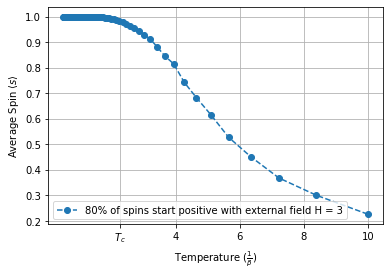

In [19]:
plt.plot(1/Bs, extf_3s1, "o--", label = "80% of spins start positive with external field H = 3")
plt.grid()
plt.xlabel(r'Temperature $(\frac{1}{\beta})$')
plt.ylabel(r'Average Spin $\langle s \rangle$')
plt.xticks([2.269, 4, 6, 8, 10], [r'$T_c$', 4, 6, 8, 10])
plt.legend()
plt.savefig('extf_3.png', dpi=200, bbox_inches = "tight")
plt.show()